In [0]:
from keras.layers import *
from keras.models import Sequential
from tensorflow.keras import Input, Model

Using TensorFlow backend.


In [0]:
import pandas as pd
import numpy as np

In [0]:
df=pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')

In [0]:
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [0]:
df=df['pm2.5']

In [0]:
df.shape

(43824,)

In [0]:
df = df.dropna()

In [0]:
df=df.reset_index(drop=True)
df

0        129.0
1        148.0
2        159.0
3        181.0
4        138.0
         ...  
41752      8.0
41753     10.0
41754     10.0
41755      8.0
41756     12.0
Name: pm2.5, Length: 41757, dtype: float64

In [0]:
from sklearn.preprocessing import MinMaxScaler
data = np.array(df)
data.shape

(41757,)

In [0]:
import numpy as np
data = np.reshape(data , (41757,1))

In [0]:
sc = MinMaxScaler()
data = sc.fit_transform(data)

In [0]:
train = data[:35060]
test = data[35060:]

In [0]:
n_steps = 7
x, y = [], []

for i in range(len(train)):
  end = i+n_steps
  if end > len(train):
    break
  x.append(train[i:end-1])
  y.append(train[end-1])

In [0]:
x_test, y_test = [], []
for i in range(len(test)):
  end = i+n_steps
  if end > len(test):
    break
  x_test.append(test[i:end-1])
  y_test.append(test[end-1])

In [0]:
X_test,Y_test=np.array(x_test),np.array(y_test)
X_train, y_train = np.array(x), np.array(y)
X_train.shape, y_train.shape,X_test.shape,Y_test.shape

((35054, 6, 1), (35054, 1), (6691, 6, 1), (6691, 1))

In [0]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -20.606825
p-value: 0.000000


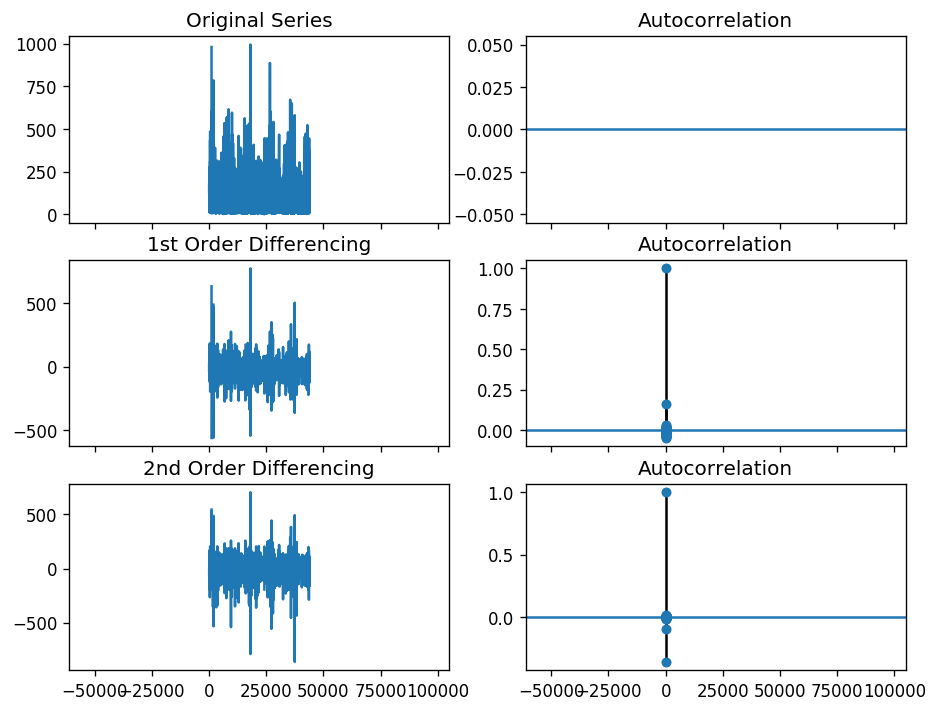

In [0]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df); axes[0, 0].set_title('Original Series')
plot_acf(df, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [0]:
# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
    scores = list()
    # calculate an RMSE score for each day
    for i in range(actual.shape[1]):
        # calculate mse
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        # calculate rmse
        rmse = sqrt(mse)
        # store
        scores.append(rmse)
    # calculate overall RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score, scores

In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [0]:
# define the model
    model = ARIMA(X_train, order=arima_order)
    # fit the model
    model_fit = model.fit(disp=False)
    # make forecast
    yhat = model_fit.predict(len(series), len(series)+6)

ValueError: ignored

In [0]:
arima_order = (1,0,0)

In [0]:
train, test = split_dataset(dataset.values, n_test)

# **Phase1**

In [0]:
data = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')

In [0]:
data = data['pm2.5']

In [0]:
data = data.dropna()

In [0]:
data=data.reset_index(drop=True)
data

0        129.0
1        148.0
2        159.0
3        181.0
4        138.0
         ...  
41752      8.0
41753     10.0
41754     10.0
41755      8.0
41756     12.0
Name: pm2.5, Length: 41757, dtype: float64

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
data = np.array(data)
data.shape

(41757,)

In [0]:
import numpy as np
data = np.reshape(data , (41757,1))

In [0]:
data.shape

(41757, 1)

In [0]:
sc = MinMaxScaler()
data = sc.fit_transform(data)

In [0]:
data

array([[0.12977867],
       [0.14889336],
       [0.15995976],
       ...,
       [0.01006036],
       [0.00804829],
       [0.01207243]])

In [0]:
train = data[:41717]
test = data[41717:]

In [0]:
train.shape, test.shape, len(train)

((41717, 1), (40, 1), 41717)

In [0]:
n_steps = 7

In [0]:
x, y = [], []

for i in range(len(train)):
  end = i+n_steps
  if end > len(train):
    break
  x.append(train[i:end-1])
  y.append(train[end-1])

In [0]:
x_test, y_test = [], []
for i in range(len(test)):
  end = i+n_steps
  if end > len(test):
    break
  x_test.append(test[i:end-1])
  y_test.append(test[end-1])

In [0]:
X_test,Y_test=np.array(x_test),np.array(y_test)

In [0]:
X_train, y_train = np.array(x), np.array(y)

In [0]:
X_train.shape, y_train.shape,X_test.shape,Y_test.shape

((41711, 6, 1), (41711, 1), (34, 6, 1), (34, 1))

In [0]:

Y_test.shape

(34, 1)

Conv1D

In [0]:
model1 = Sequential()
model1.add(Conv1D(32,(2), activation = 'relu',input_shape = (6, 1)))
model1.add(MaxPool1D(pool_size=(2)))
model1.add(Flatten())
model1.add(Dense(20, activation ='relu'))
model1.add(Dense(50, activation = 'relu'))
model1.add(Dense(1))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [0]:
X_train.shape

(41711, 6, 1)

In [0]:
model1.compile(loss='mse', optimizer='adam')
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 5, 32)             96        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1300      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                1050      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
____________________________________________________

In [0]:
model1.fit(X_train, y_train, epochs = 20,validation_split=0.2)


Train on 33368 samples, validate on 8343 samples
Epoch 1/20
33368/33368 [==============================] - 2s 54us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 2/20
33368/33368 [==============================] - 2s 49us/step - loss: 0.0015 - val_loss: 0.0011
Epoch 3/20
33368/33368 [==============================] - 2s 48us/step - loss: 0.0015 - val_loss: 0.0011
Epoch 4/20
33368/33368 [==============================] - 2s 48us/step - loss: 0.0014 - val_loss: 0.0012
Epoch 5/20
33368/33368 [==============================] - 2s 49us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 6/20
33368/33368 [==============================] - 2s 48us/step - loss: 0.0014 - val_loss: 0.0011
Epoch 7/20
33368/33368 [==============================] - 2s 49us/step - loss: 0.0014 - val_loss: 0.0011
Epoch 8/20
33368/33368 [==============================] - 2s 49us/step - loss: 0.0014 - val_loss: 0.0011
Epoch 9/20
33368/33368 [==============================] - 2s 48us/step - loss: 0.0014 - val_loss: 0.0011
Epoch

In [0]:
con1D_predict=model1.predict(X_test)
con1D_predict

GRU

In [0]:
GRUmodel = Sequential()
GRUmodel.add(GRU(200, activation='relu',input_shape = (6, 1) ))
GRUmodel.add(Dense(50, activation = 'relu'))
GRUmodel.add(Dense(1))

In [0]:
GRUmodel.compile(loss='mse', optimizer='adam')
GRUmodel.summary()

In [0]:
GRUmodel.fit(X_train, y_train, epochs = 20,validation_split=0.2)

In [0]:
GRU_predict=GRUmodel.predict(X_test)
GRU_predict

LSTM

In [0]:


LSTMmodel = Sequential()
LSTMmodel.add(LSTM(200, activation='relu',input_shape = (6, 1) ))
LSTMmodel.add(Dense(50, activation = 'relu'))
LSTMmodel.add(Dense(1))

In [0]:
LSTMmodel.compile(loss='mse', optimizer='adam')
LSTMmodel.summary()

In [0]:
LSTMmodel.fit(X_train, y_train, epochs = 20,validation_split=0.2)

In [0]:
LSTM_predict=LSTMmodel.predict(X_test)

In [0]:
#pip install keras-tcn


In [0]:

from tcn import TCN
from tensorflow.keras import Input, Model


In [0]:
from tensorflow.keras.layers import Dense

In [0]:
batch_size, timesteps, input_dim = None, 6, 1
i = Input(batch_shape = (batch_size, timesteps, input_dim))
i.shape

TensorShape([Dimension(None), Dimension(6), Dimension(1)])

In [0]:
o = TCN(return_sequences=False)(i)  # The TCN layers are here.
o = Dense(1)(o)

m = Model(inputs=[i], outputs=[o])
m.compile(optimizer='adam', loss='mse')
m.fit(X_train, y_train, epochs=20, validation_split=0.2)

Train on 33368 samples, validate on 8343 samples
Epoch 1/20
33368/33368 [==============================] - 35s 1ms/sample - loss: 0.0204 - val_loss: 9.5992e-04
Epoch 2/20
33368/33368 [==============================] - 33s 1000us/sample - loss: 0.0019 - val_loss: 0.0011
Epoch 3/20
33368/33368 [==============================] - 34s 1ms/sample - loss: 0.0014 - val_loss: 8.1331e-04
Epoch 4/20
33368/33368 [==============================] - 34s 1ms/sample - loss: 0.0010 - val_loss: 6.5770e-04
Epoch 5/20
33368/33368 [==============================] - 34s 1ms/sample - loss: 0.0014 - val_loss: 8.0081e-04
Epoch 6/20
33368/33368 [==============================] - 34s 1ms/sample - loss: 7.9222e-04 - val_loss: 7.9442e-04
Epoch 7/20
33368/33368 [==============================] - 34s 1ms/sample - loss: 7.6966e-04 - val_loss: 5.0479e-04
Epoch 8/20
33368/33368 [==============================] - 34s 1ms/sample - loss: 8.0634e-04 - val_loss: 4.7610e-04
Epoch 9/20
33368/33368 [============================

In [0]:
TCN_predict=m.predict(X_test)

# **Con1D_Evalution**

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [0]:
def model_evaluate(y_real,y_pred):
  Y_real,Y_predict = [], []
  n_step=24
  for i in range(34):
    end = i+n_step
    if end > 34:
      break
    Y_real.append(y_real[i:end])
    Y_predict.append(y_pred[i:end])
  return Y_real,Y_predict

In [0]:
def model_evaluate2(Y_real,Y_predict):
  mae_scores=list()
  rmse_scores=list()
  r2_scores=list()
  for i in range(len(Y_real)):
    mae=mean_absolute_error(Y_real[i],Y_predict[i])
    rmse=mean_squared_error(Y_real[i],Y_predict[i])
    r2=r2_score(Y_real[i],Y_predict[i])
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)
  return mae_scores,rmse_scores,r2_scores

In [0]:
Y_test=Y_test.reshape(34)
#Con1D
con1D_predict=con1D_predict.reshape(con1D_predict.shape[0])
Y_real,Y_predict=model_evaluate(np.array(Y_test),np.array(con1D_predict))
mae_scores_Con1D,rmse_scores_Con1D,r2_scores_Con1D=model_evaluate2(Y_real,Y_predict)
#GRU
GRU_predict=GRU_predict.reshape(GRU_predict.shape[0])
Y_real,Y_predict=model_evaluate(np.array(Y_test),np.array(GRU_predict))
mae_scores_GRU,rmse_scores_GRU,r2_scores_GRU=model_evaluate2(Y_real,Y_predict)
#LSTM
LSTM_predict=LSTM_predict.reshape(LSTM_predict.shape[0])
Y_real,Y_predict=model_evaluate(np.array(Y_test),np.array(LSTM_predict))
mae_scores_LSTM,rmse_scores_LSTM,r2_scores_LSTM=model_evaluate2(Y_real,Y_predict)
#TCN
TCN_predict=TCN_predict.reshape(TCN_predict.shape[0])
Y_real,Y_predict=model_evaluate(np.array(Y_test),np.array(TCN_predict))
mae_scores_TCN,rmse_scores_TCN,r2_scores_TCN=model_evaluate2(Y_real,Y_predict)




In [0]:
import matplotlib.pyplot as plt


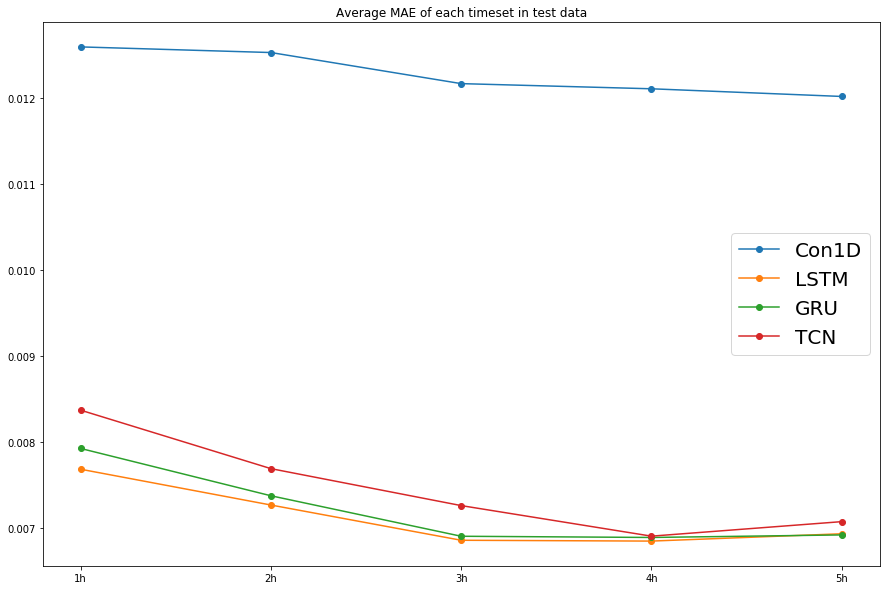

In [0]:
fig=plt.figure()
plt.title('Average MAE of each timeset in test data')
plt.rcParams['figure.figsize']=(15,10)
timesteps=['1h','2h','3h','4h','5h']
plt.plot(timesteps,mae_scores_Con1D[0:5],marker='o',label='Con1D')
plt.plot(timesteps,mae_scores_LSTM[0:5],marker='o',label='LSTM')
plt.plot(timesteps,mae_scores_GRU[0:5],marker='o',label='GRU')
plt.plot(timesteps,mae_scores_TCN[0:5],marker='o',label='TCN')
plt.legend(fontsize=20)
plt.show()
#fig.savefig('MAE.png')

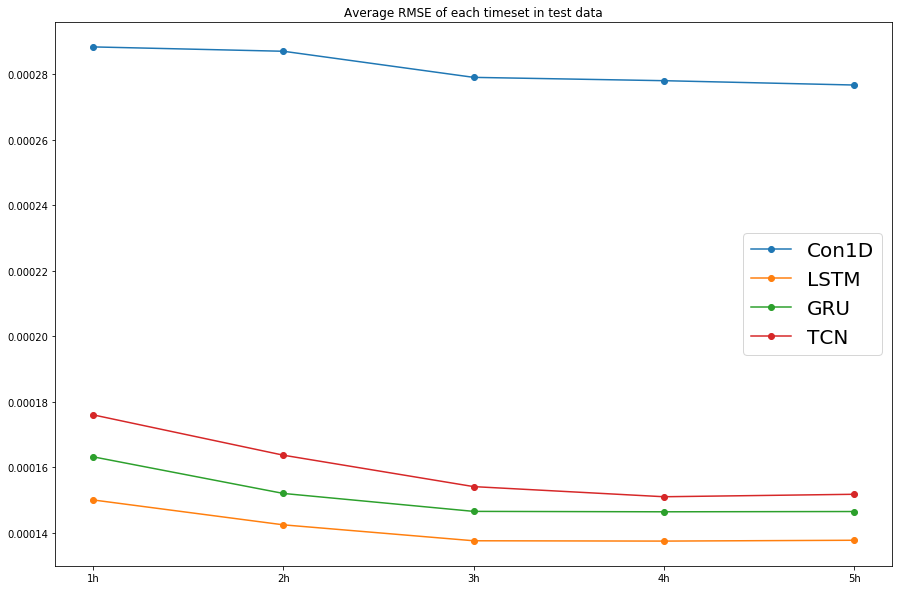

In [0]:
fig=plt.figure()
plt.title('Average RMSE of each timeset in test data')
plt.rcParams['figure.figsize']=(15,10)
timesteps=['1h','2h','3h','4h','5h']#,'6h','7h','8h','9h','10h','11h']
plt.plot(timesteps,rmse_scores_Con1D[0:5],marker='o',label='Con1D')
plt.plot(timesteps,rmse_scores_LSTM[0:5],marker='o',label='LSTM')
plt.plot(timesteps,rmse_scores_GRU[0:5],marker='o',label='GRU')
plt.plot(timesteps,rmse_scores_TCN[0:5],marker='o',label='TCN')
plt.label()
plt.legend(fontsize=20)
plt.show()
#fig.savefig('RMSE.png')

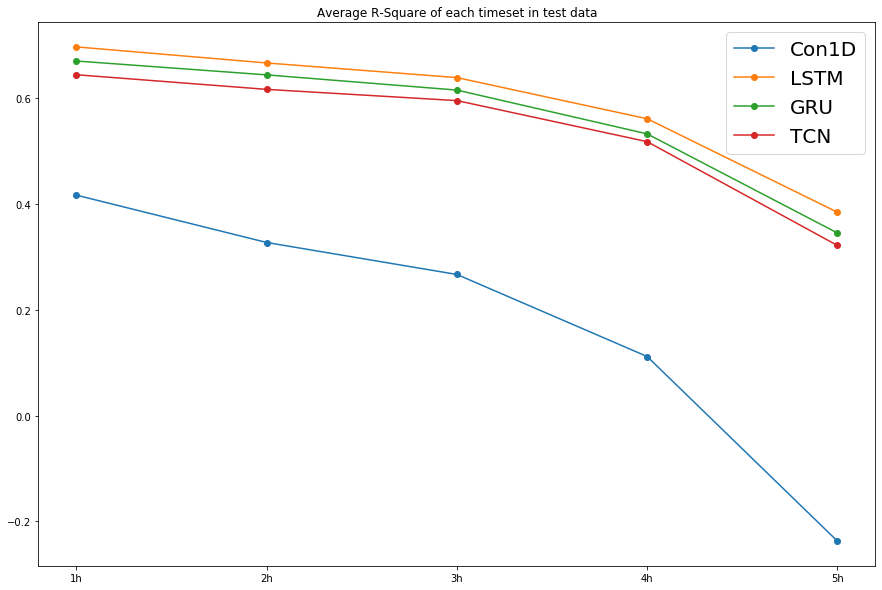

In [0]:
fig=plt.figure()
plt.title('Average R-Square of each timeset in test data')
plt.rcParams['figure.figsize']=(15,10)
timesteps=['1h','2h','3h','4h','5h']#,'6h','7h','8h','9h','10h','11h']
plt.plot(timesteps,r2_scores_Con1D[0:5],marker='o',label='Con1D')
plt.plot(timesteps,r2_scores_LSTM[0:5],marker='o',label='LSTM')
plt.plot(timesteps,r2_scores_GRU[0:5],marker='o',label='GRU')
plt.plot(timesteps,r2_scores_TCN[0:5],marker='o',label='TCN')
plt.legend(fontsize=20)
plt.show()
#fig.savefig('MAE.png')